<a href="https://colab.research.google.com/github/lagerasimov/Analysing_dataset_with_mobiles/blob/main/Mobiles_Dataset_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Загружаем данные

In [134]:
import kagglehub
import pandas as pd
import os

# Загружаем датасет
path = kagglehub.dataset_download("abdulmalik1518/mobiles-dataset-2025")
print("Путь к данным:", path)  # Проверяем, куда загрузились данные

files = os.listdir(path)
print("Файлы в директории:", files)
full_path = os.path.join(path, 'Mobiles Dataset (2025).csv')
df = pd.read_csv(full_path, encoding='latin1')

Путь к данным: /kaggle/input/mobiles-dataset-2025
Файлы в директории: ['Mobiles Dataset (2025).csv']


In [135]:
display(df)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [136]:
print(df.isna().any(axis=1).sum()) #смотрим, сколько есть строк с пропущенными значениями (с NaN)
#получим, что таких строк нет => ничего удалять не требуется

0


Анализируем датасет

Рассмотрим, какие производители есть в датасете

In [137]:
companies = df['Company Name'].unique()
print(*companies)

Apple Samsung OnePlus Vivo iQOO Oppo Realme Xiaomi Lenovo Motorola Huawei Nokia Sony Google Tecno Infinix Honor POCO Poco


Импортируем модуль для визуализации данных

In [138]:
from matplotlib import pyplot as plt

Построим график средней цены моделей iPhone на старте продаж в зависимости от года выпуска в США

In [139]:
years = df.loc[df['Company Name'] == "Apple"]['Launched Year'].unique().astype(int)
years.sort()

names = ["Apple", "Samsung"]
prices = ['']*2

for i in range(2):
  # Сначала очищаем строки от лишних символов
  cleaned_prices = df['Launched Price (USA)'].replace(r'USD|\s|,', '', regex=True)

  # Затем конвертируем в числа
  df['Launched Price (USA)'] = pd.to_numeric(cleaned_prices)

  prices[i] = df.loc[(df['Company Name'] == names[i]) & (df['Launched Year'].isin(years))].groupby('Launched Year')['Launched Price (USA)'].mean()

  print(prices[i])

iphone_prices, samsung_prices = prices[0], prices[1]

Launched Year
2017    1049.000000
2018    1065.666667
2019     935.363636
2020    1017.888889
2021    1007.333333
2022    1086.500000
2023    1086.500000
2024    1011.500000
Name: Launched Price (USA), dtype: float64
Launched Year
2017     239.000000
2018     165.666667
2019    1036.500000
2020     991.857143
2021     824.000000
2022     811.500000
2023     625.666667
2024    1252.000000
Name: Launched Price (USA), dtype: float64


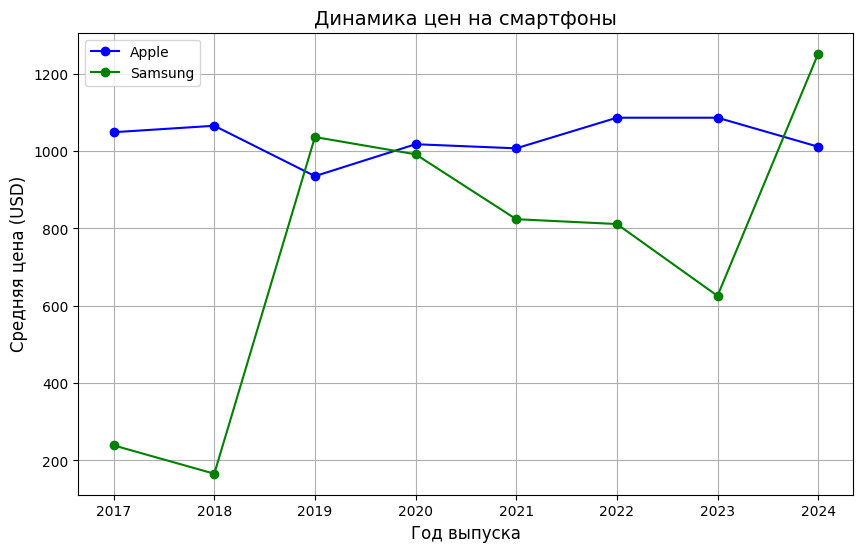

In [140]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, iphone_prices,
        color='blue',
        marker='o',
        linestyle='-',
        label='Apple')

ax.plot(years, samsung_prices,
        color='green',
        marker='o',
        linestyle='-',
        label='Samsung')

ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Средняя цена (USD)', fontsize=12)
ax.set_title('Динамика цен на смартфоны', fontsize=14)
ax.grid(True)
ax.legend(fontsize=10)

saved_plot_apple = {
    'figure': fig,
    'axes': ax,
    'line': ax.lines[0]
}

plt.show()

Можно заметить, что:


*   Cредняя цена моделей смартфонов Apple, в отличие от Samsung, менялась незначительно
*   В 2019 и 2024 годах средняя цена моделей смартфонов Samsung превзошла Apple (причём в последний раз - значительно)




Рассмотрим изменение тренда на вес смартфонов

In [141]:
# Сначала очищаем строки от лишних символов
cleaned_weight = df['Mobile Weight'].replace('g', '', regex=True)

# Затем конвертируем в числа
df['Mobile Weight'] = pd.to_numeric(cleaned_weight)

median_weights = df.loc[df['Launched Year'].isin(years)].groupby('Launched Year')['Mobile Weight'].median()

print(median_weights)

Launched Year
2017    165.0
2018    177.0
2019    189.0
2020    192.0
2021    190.0
2022    195.0
2023    196.0
2024    195.0
Name: Mobile Weight, dtype: float64


<ipython-input-142-32ca194c0237>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=10)


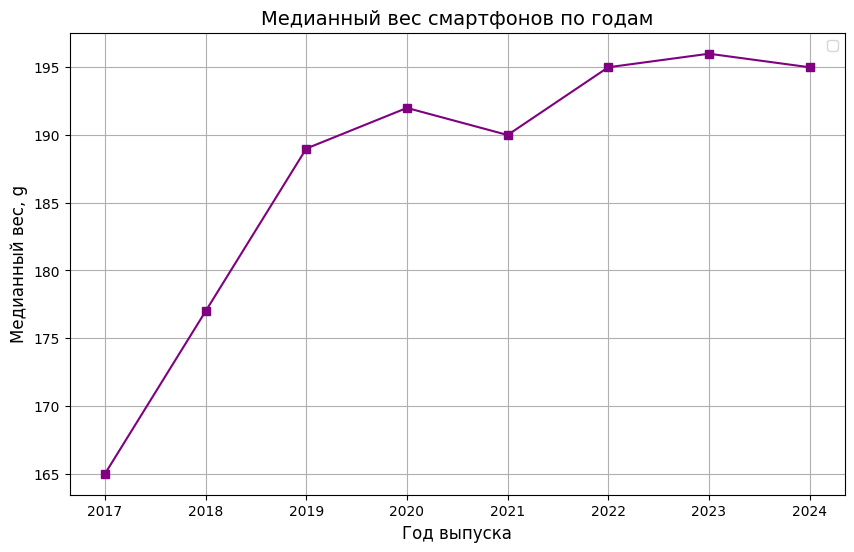

In [142]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, median_weights,
        color='purple',
        marker='s',
        linestyle='-')

ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Медианный вес, g', fontsize=12)
ax.set_title('Медианный вес смартфонов по годам', fontsize=14)
ax.grid(True)
ax.legend(fontsize=10)

saved_plot_apple = {
    'figure': fig,
    'axes': ax,
    'line': ax.lines[0]
}

plt.show()

Заметим, что:


*   За 7 лет медианный вес увеличился на 30 грамм
*   В последние 3 года медианный вес почти не менялся
*   Наибольший прирост медианного веса (примерно на 24 грамма) пришёлся на промежуток 2017-2019 г.
*   С 2019 года медианный вес увеличился лишь на 6 грамм





Рассмотрим распределение размеров экранов

In [143]:
df['Screen Size'] = [x[:3] if '.' in x else x[0] for x in df['Screen Size'] ]
df['Screen Size'] = pd.to_numeric(df['Screen Size'], errors='coerce')
print(df['Screen Size'].head())
print(df['Screen Size'].unique())  # Должно быть float64

0    6.1
1    6.1
2    6.1
3    6.7
4    6.7
Name: Screen Size, dtype: float64
[ 6.1  6.7  5.4  5.8  6.5 10.   7.9  1.  12.   6.8  6.6  7.6  6.4  6.9
  6.3  5.3  6.   5.5  5.7  5.2 14.   8.7  8.   7.8  6.2 11.   5.   7.1
 13.   5.6  9.7  7. ]


In [144]:
import numpy as np

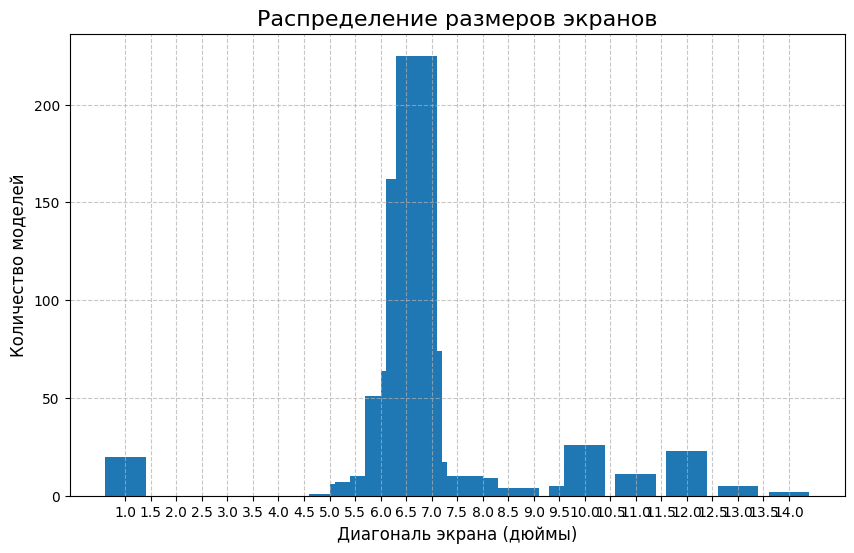

In [153]:
value_counts = df['Screen Size'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10, 6))

value_counts = df['Screen Size'].value_counts().sort_index()
ax.bar(value_counts.index, value_counts.values)

min_x = value_counts.index.min()
max_x = value_counts.index.max()
xticks = np.arange(min_x, max_x + 0.5, 0.5)  # шаг 0.5
ax.set_xticks(xticks)


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlabel('Диагональ экрана (дюймы)', fontsize=12)
ax.set_ylabel('Количество моделей', fontsize=12)
ax.set_title('Распределение размеров экранов', fontsize=16)

plt.show()

Видно, что большинство моделей имеют размеры приблизительно дюймаот 6.3 до 7.1 дюйма